In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv(r"D:\New folder (2)\Documents\Downloads\Clustering (1)\Clustering\Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
from sklearn.cluster import KMeans

In [5]:
x=df.drop(columns=['CustomerID','Genre','Age'])

E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


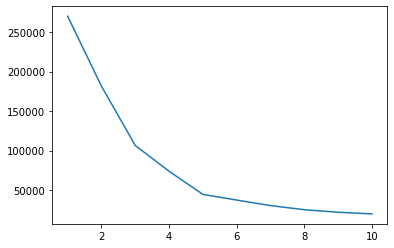

In [6]:
wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=50)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.show()

In [7]:
kmeans=KMeans(n_clusters=5,init="k-means++",random_state=50)
y_kmeans=kmeans.fit_predict(x)

<function matplotlib.pyplot.show(close=None, block=None)>

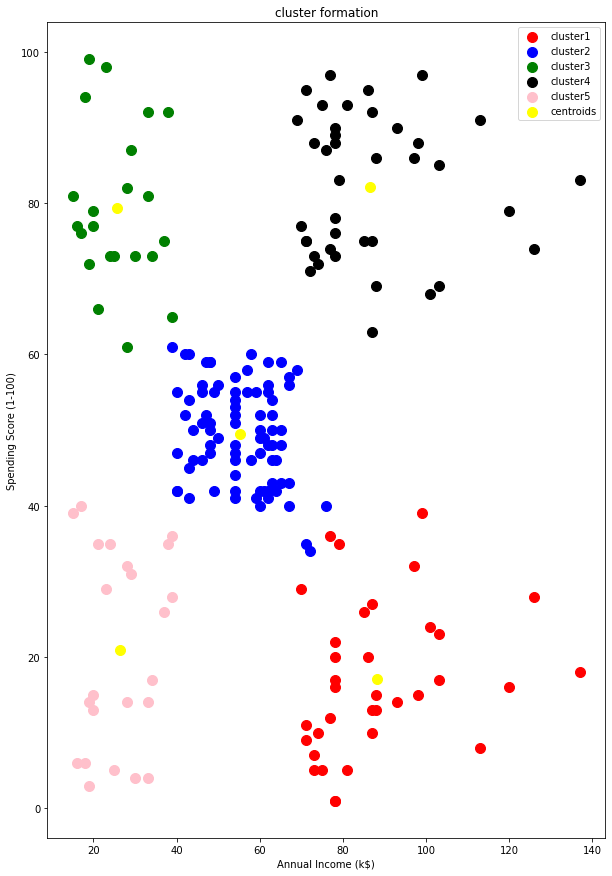

In [8]:
plt.figure(figsize=(10,15))
plt.scatter(x[y_kmeans==0]["Annual Income (k$)"],x[y_kmeans==0]["Spending Score (1-100)"],s=100,c="red",label="cluster1")
plt.scatter(x[y_kmeans==1]["Annual Income (k$)"],x[y_kmeans==1]["Spending Score (1-100)"],s=100,c="blue",label="cluster2")
plt.scatter(x[y_kmeans==2]["Annual Income (k$)"],x[y_kmeans==2]["Spending Score (1-100)"],s=100,c="green",label="cluster3")
plt.scatter(x[y_kmeans==3]["Annual Income (k$)"],x[y_kmeans==3]["Spending Score (1-100)"],s=100,c="black",label="cluster4")
plt.scatter(x[y_kmeans==4]["Annual Income (k$)"],x[y_kmeans==4]["Spending Score (1-100)"],s=100,c="pink",label="cluster5")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c="yellow",label="centroids")
plt.title("cluster formation")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show

In [9]:
kmeans.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348]])

In [11]:
test=kmeans.predict(np.asarray([[147,80]]))
test[0]

3